This is a simple linear regression task as it involves 2 variables only.

Here we will use Python Scikit-Learn library(ML) to predict the percentage of marks of an student based on the no of study hours.

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline


In [16]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
# Loading and Reading the data
data=pd.read_csv('http://bit.ly/w-data')
print("Shape of the data set: ",data.shape)
data.head()

Shape of the data set:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Making a copy of the original data set
df=data.copy()
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Getting some more understanding of the data 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


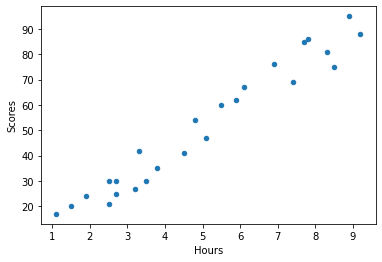

In [34]:
# Scatter Plot
df.plot(x='Hours',y='Scores',kind='scatter')


By analyzing the plot, there is a clear positive linear relationship between the dependent and the independent variables.
So we can apply linear regression model.

In [35]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [36]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [37]:
#Splitting the data into train and test data 
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [38]:
# fit the training data into linear regression model
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train) 

LinearRegression()

In [39]:
# Predicting train data
pred_train=reg.predict(x_train)


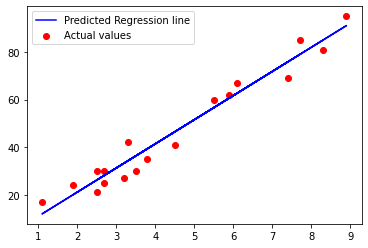

In [41]:
#Plotting the actual and predicted values of train data
plt.plot(x_train,pred_train,label='Predicted Regression line',color='b')
plt.scatter(x_train,y_train,label='Actual train values',color='r')
plt.legend()

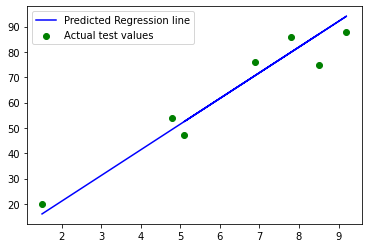

In [43]:
# Predicting test data
pred_test=reg.predict(x_test)

#Plotting the actual and predicted values of test data
plt.plot(x_test,pred_test,label='Predicted Regression line',color='b')
plt.scatter(x_test,y_test,label='Actual test values',color='g')
plt.legend()

In [48]:
# Predicting the given value i.e., 9.25 hrs
reg.predict(([[9.25]]))

array([94.61670171])

So, according to our model, if a student study for 9.25 hrs per day he/she can score 94.62% marks. 

In [49]:
# Predicting the same value in a different way.

m=reg.coef_
c=reg.intercept_
x=9.25
y=m*x+c

print('The coefficient is ',m)
print('The y-intercept is ',c)
print('y = ',y)

The coefficient is  [10.14236036]
The y-intercept is  0.799868357438676
y =  [94.61670171]


Output is same as above.


In [50]:
y_pred= reg.predict(x_test)

pred_df = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
pred_df

,Actual,Predicted
0,20,16.013409
1,54,49.483198
2,88,94.109584
3,47,52.525906
4,76,70.782155
5,86,79.910279
6,75,87.009931


In [51]:
# Model Evaluation
print('Accuracy: ',reg.score(x_test,y_test))
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_pred))

Accuracy:  0.9143136754377923
Mean absolute error:  6.2080543279364315
